In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import os

pd.set_option("precision",2)
pd.set_option("expand_frame_repr", False)
pd.set_option("max_columns", 20)
np.printoptions(precision=2, suppress=True)

with open("../setting.json") as f:
    setting = json.load(f)
data_arr = []
for id in sorted(os.listdir("../Raw")):
    data_arr.append(pd.read_excel(f"../Preprocess/{id}.xlsx"))

n_user = len(data_arr)
data = pd.concat(data_arr, keys = list(range(1,n_user+1)))
data["user"] = data.index.get_level_values(0)
data.reset_index(drop = True, inplace = True)

In [6]:
data

,Unnamed: 0,day,hour,weekday,by,comb_act_idx,watch_act_idx,phone_act_idx,timestamp,device,duration,run,walk,step,speed,distance,calorie,user
0,0,0,0,2,none,0,0,0,2020-12-09 00:00:00,phone,0,0,0,0,0.0,0.0,0.0,1
1,1,0,0,2,none,0,0,0,2020-12-09 00:00:00,watch,0,0,0,0,0.0,0.0,0.0,1
2,2,0,0,2,none,0,0,0,2020-12-09 00:01:00,phone,0,0,0,0,0.0,0.0,0.0,1
3,3,0,0,2,none,0,0,0,2020-12-09 00:01:00,watch,0,0,0,0,0.0,0.0,0.0,1
4,4,0,0,2,none,0,0,0,2020-12-09 00:02:00,phone,0,0,0,0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259195,51835,17,23,3,none,0,0,0,2021-08-05 23:57:00,watch,0,0,0,0,0.0,0.0,0.0,3
259196,51836,17,23,3,none,0,0,0,2021-08-05 23:58:00,phone,0,0,0,0,0.0,0.0,0.0,3
259197,51837,17,23,3,none,0,0,0,2021-08-05 23:58:00,watch,0,0,0,0,0.0,0.0,0.0,3
259198,51838,17,23,3,none,0,0,0,2021-08-05 23:59:00,phone,0,0,0,0,0.0,0.0,0.0,3


Text(0.02, 0.5, 'Step difference')

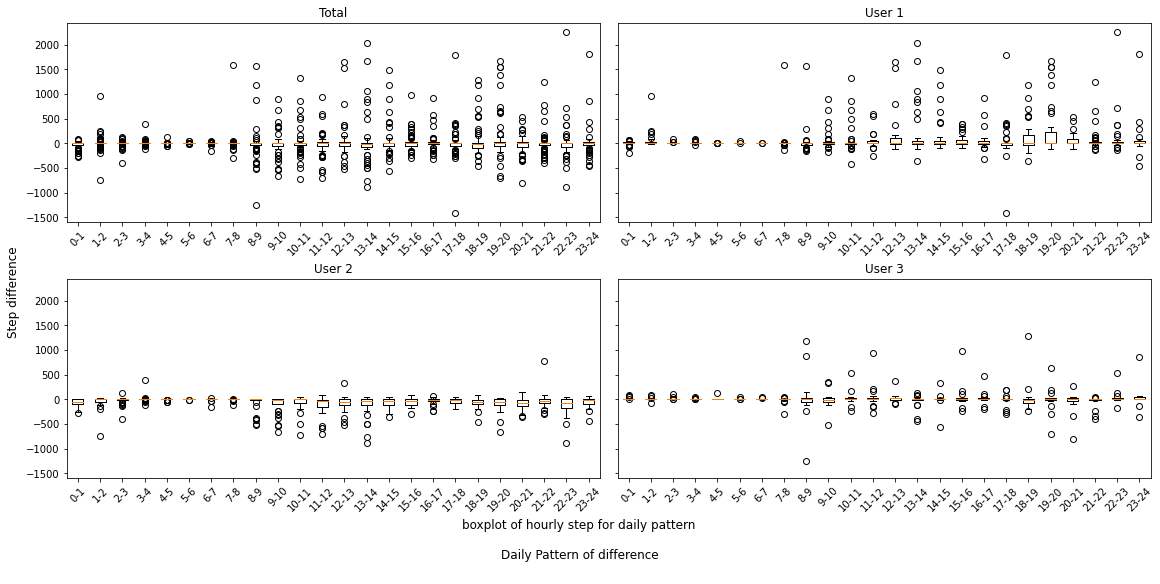

In [23]:
def diff(x):
    x= x.to_numpy()
    return x[0]-x[1]
week_data = data.groupby(["user", "day", "hour", "device"]).sum().groupby(["user","day","hour"]).agg(phone=("step","first"), watch=("step","last"), diff =("step", diff)).reset_index(level=2)
fig, ax = plt.subplots(nrows=2, ncols= 2, constrained_layout = True, figsize= (16,8), sharey= True)
ax = ax.flatten()
for idx, ax_ in enumerate(ax):
    if idx == 0:
        ax_.boxplot([week_data.query(f"hour== {i}")["diff"] for i in range(24)])
        ax_.set_title("Total")
    else:
        ax_.boxplot([week_data.query(f"user == {idx} and hour== {i}")["diff"] for i in range(24)])
        ax_.set_title(f"User {idx}")
    ax_.set_xticks(np.arange(1,25))
    ax_.set_xticklabels([f"{i}-{i+1}" for i in range(24)], rotation= 45)

fig.supxlabel('''boxplot of hourly step for daily pattern 

Daily Pattern of difference
''')
fig.supylabel("Step difference")